# Amazon Product Success Score Prediction with AutoGluon

이 노트북에서는 Amazon Sales 데이터를 사용하여 제품의 성공 점수(Success Score)를 예측하는 모델을 구축합니다.
AutoGluon AutoML 프레임워크를 사용합니다.

## 목차
1. 환경 설정 및 라이브러리 임포트
2. 데이터 로드 및 전처리 (Data Loading & Cleaning)
3. 특성 엔지니어링 (Feature Engineering)
4. 데이터 분석 및 시각화 (EDA)
5. 모델링 (AutoGluon TabularPredictor)
6. 모델 평가 및 분석

https://github.com/hyeonahson-hash/Amazon-Sales-Dataset/tree/69b653c08c7f62779abc08e3e1b595d72a4307c5/Amazon

product_id : 제품 ID

product_name : 제품명

category : 제품 카테고리

discounted_price : 제품의 할인된 가격

actual_price : 제품의 실제 가격

discount_percentage : 제품 할인율 %

rating : 제품 평점 

rating_count : 아마존 평점에 투표한 사람 수 

about_product	 : 제품 설명

user_id	: 제품에 대한 리뷰를 작성한 사용자의 ID

user_name	: 제품에 대한 리뷰를 작성한 사용자의 이름

review_id : 사용자 리뷰의 ID 

review_title : 리뷰 제목

review_content	: 리뷰 내용

img_link : 제품 이미지 링크

product_link : 제품 링크

In [37]:
# 필요 라이브러리 설치
#!pip install autogluon pandas numpy matplotlib seaborn scikit-learn

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

# 한글 폰트 설정 (Windows 환경, 필요시 변경)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

## 2. 데이터 로드

In [39]:
# 데이터 로드
df = pd.read_csv('amazon.csv')

# 데이터 확인
display(df.head())
print(df.info())

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## 3. 전처리 및 데이터 시각화

In [40]:
def clean_currency(x):
    if isinstance(x, str):
        return float(x.replace('₹', '').replace(',', ''))
    return x

def clean_percentage(x):
    if isinstance(x, str):
        return float(x.replace('%', '')) / 100
    return x

# 가격 및 할인율 정제
df['discounted_price'] = df['discounted_price'].apply(clean_currency)
df['actual_price'] = df['actual_price'].apply(clean_currency)
df['discount_percentage'] = df['discount_percentage'].apply(clean_percentage)

# Rating Count 정제 (쉼표 제거)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
# 결측치나 이상한 값 처리 (예: 데이터가 없는 경우 0으로 처리하거나 제외)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0)

# Rating 정제 (문자열이 섞여있을 수 있음)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Rating 결측치는 제거 
df = df.dropna(subset=['rating', 'rating_count', 'discounted_price', 'actual_price'])

print("전처리 후 데이터 정보:")
print(df.info())

전처리 후 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 1464 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1464 non-null   object 
 1   product_name         1464 non-null   object 
 2   category             1464 non-null   object 
 3   discounted_price     1464 non-null   float64
 4   actual_price         1464 non-null   float64
 5   discount_percentage  1464 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1464 non-null   float64
 8   about_product        1464 non-null   object 
 9   user_id              1464 non-null   object 
 10  user_name            1464 non-null   object 
 11  review_id            1464 non-null   object 
 12  review_title         1464 non-null   object 
 13  review_content       1464 non-null   object 
 14  img_link             1464 non-null   object 
 15  product_link         1464 non

In [41]:
# 1. 리뷰 수가 0인 데이터만 따로 추출
zero_reviews = df[df['rating_count'] == 0]

print(f"리뷰 수가 0인 데이터 총 개수: {len(zero_reviews)}개")

리뷰 수가 0인 데이터 총 개수: 2개


In [42]:
# 1. rating_count가 0보다 큰 데이터만 남기기
df = df[df['rating_count'] > 0].copy()

In [43]:
# 1. 리뷰 수가 0인 데이터만 따로 추출
zero_reviews = df[df['rating_count'] == 0]

print(f"리뷰 수가 0인 데이터 총 개수: {len(zero_reviews)}개")

리뷰 수가 0인 데이터 총 개수: 0개


In [44]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,3129.981826,5453.087743,0.476724,4.096717,18307.376881
std,6950.548042,10884.467444,0.216139,0.289497,42766.096572
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1191.500000
50%,799.000000,1670.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4321.250000,0.630000,4.300000,17342.250000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [45]:
#img_link, product_link 열 삭제

df.drop(columns=['img_link', 'product_link', 'product_id', 'user_id', 'review_id'], inplace=True)

In [46]:
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_name,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Kunal,Himanshu,viswanath,sai niharka,saqib mal...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [47]:
# Category 분리 : `|` 기준으로 Main, Sub Category 생성
# 예: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
df['category_split'] = df['category'].str.split('|')
df['main_category'] = df['category_split'].str[0]
df['sub_category'] = df['category_split'].str[-1] # 가장 세부 카테고리

In [48]:
df['main_category'].value_counts().head(10) 

main_category
Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [49]:
df['sub_category'].value_counts().head(15)

sub_category
USBCables              231
SmartWatches            76
Smartphones             68
SmartTelevisions        63
In-Ear                  52
RemoteControls          49
MixerGrinders           27
Mice                    24
HDMICables              24
DryIrons                24
InstantWaterHeaters     23
LintShavers             22
FanHeaters              20
ElectricHeaters         20
HandBlenders            19
Name: count, dtype: int64

In [50]:
# 1. 삭제하고 싶은 카테고리 목록 만들기
exclude_categories = [
    'MusicalInstruments', 
    'HomeImprovement', 
    'Toys&Games', 
    'Car&Motorbike', 
    'Health&PersonalCare'
]

# 2. 해당 카테고리가 '포함되지 않은' 데이터만 다시 저장하기
# df['sub_category'].isin(exclude_categories) 는 삭제할 대상들을 찾는 코드이고,
# 앞의 ~ 표시가 "그것들을 제외해라"라는 뜻입니다.
df = df[~df['main_category'].isin(exclude_categories)].copy()

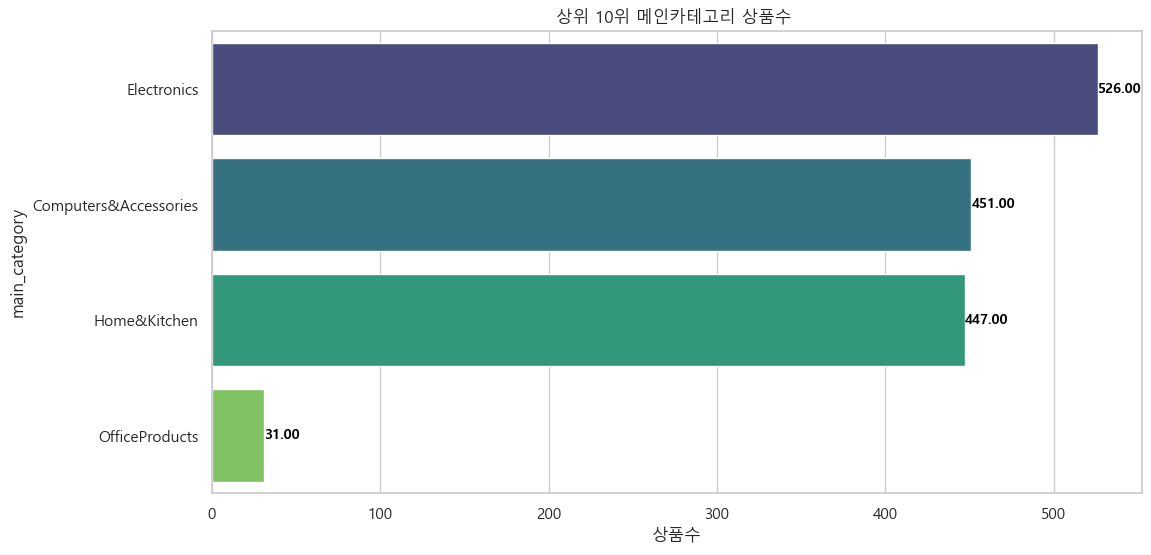

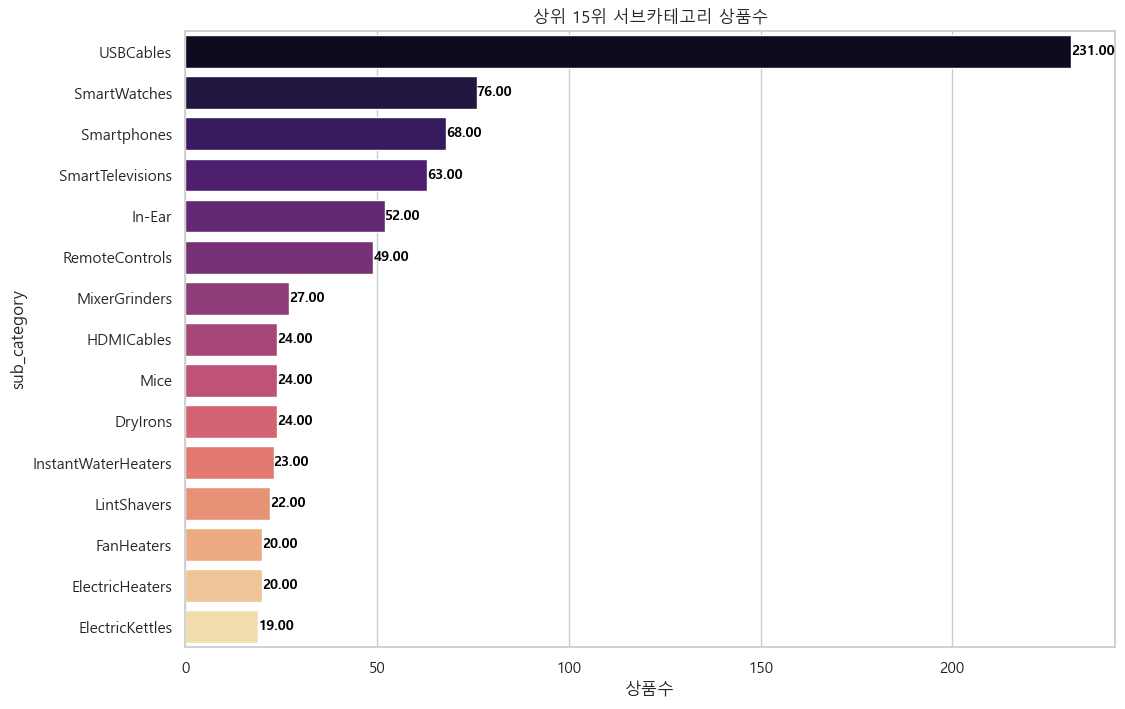

In [51]:
# 1. 카테고리별 상품 수 시각화
plt.figure(figsize=(12, 6))
top_main_cats = df['main_category'].value_counts().head(10)
ax1=sns.barplot(x=top_main_cats.values, y=top_main_cats.index, palette='viridis')

for i, v in enumerate(top_main_cats.values):
    # x축 값(v) 옆에 텍스트를 표시 (
    ax1.text(v, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)
    
plt.title('상위 10위 메인카테고리 상품수 ')
plt.xlabel('상품수')
plt.show()

plt.figure(figsize=(12, 8))
top_sub_cats = df['sub_category'].value_counts().head(15)
ax2=sns.barplot(x=top_sub_cats.values, y=top_sub_cats.index, palette='magma')

for i, v in enumerate(top_sub_cats.values):
    # x축 값(v) 옆에 텍스트를 표시
    ax2.text(v, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)

plt.title('상위 15위 서브카테고리 상품수')
plt.xlabel('상품수')
plt.show()

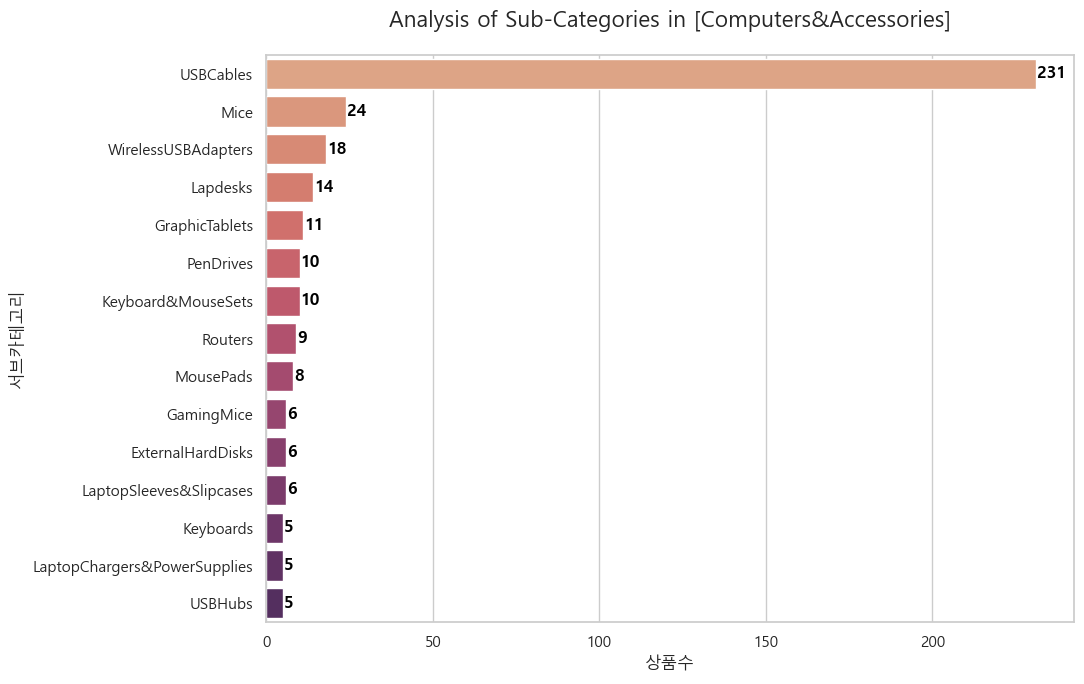

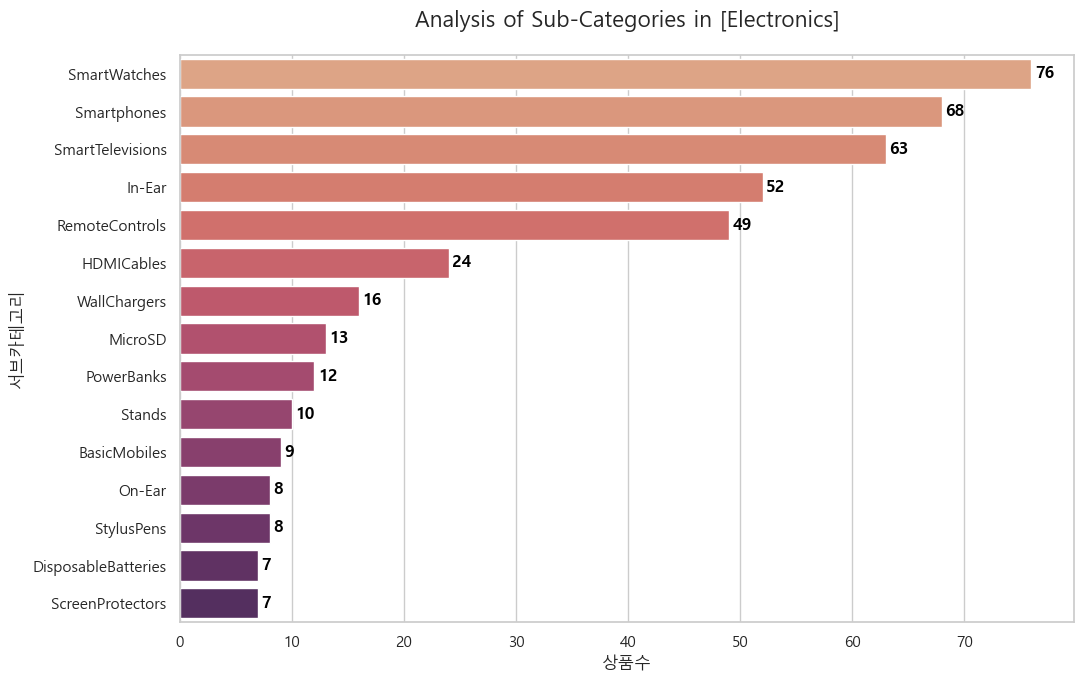

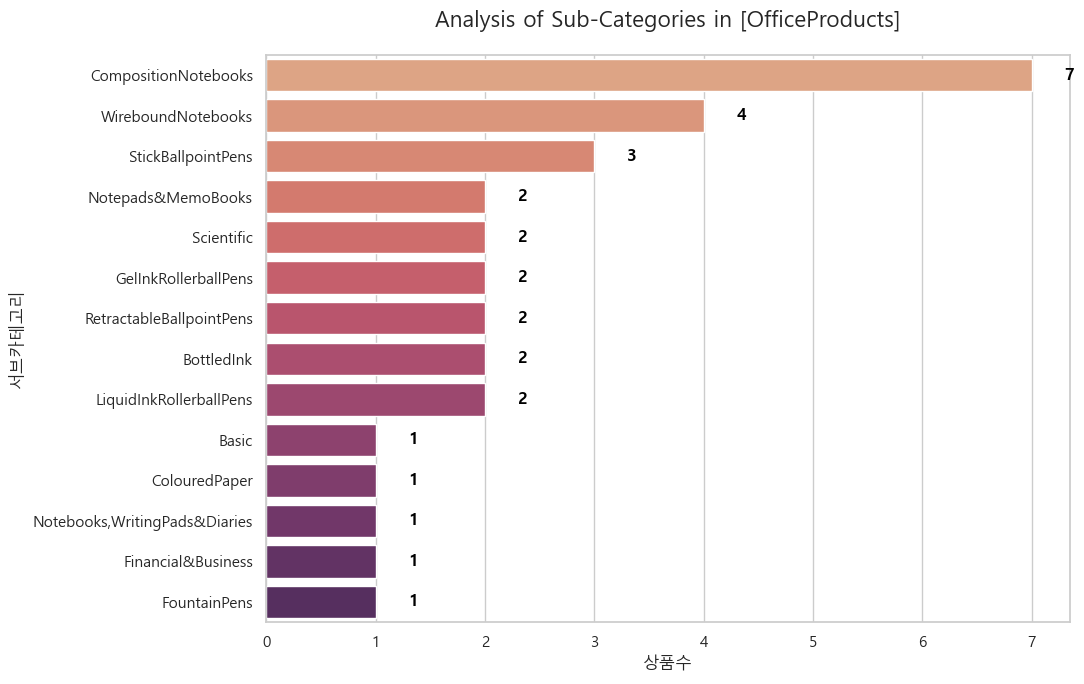

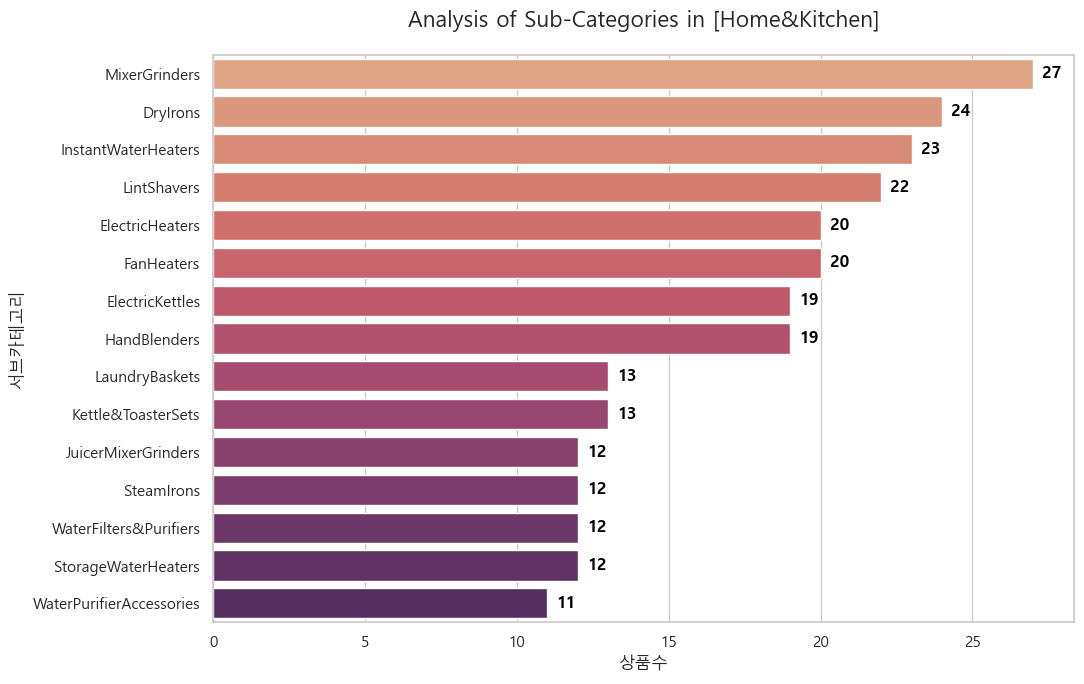

In [52]:
# 2. 메인 카테고리 리스트 추출
main_categories = df['main_category'].unique()

# 3. 반복문으로 그래프 그리기
for cat in main_categories:
    temp_df = df[df['main_category'] == cat]
    sub_counts = temp_df['sub_category'].value_counts().head(15) # 너무 많으면 복잡하니 상위 15개만
    
    if sub_counts.empty: continue # 데이터가 없으면 건너뜀

    plt.figure(figsize=(11, 7))
    
    # 그래프 그리기
    ax = sns.barplot(x=sub_counts.values, y=sub_counts.index, palette='flare')
    
    # --- 숫자 레이블 추가하는 부분 ---
    for i, v in enumerate(sub_counts.values):
        # x축 값(v) 옆에 텍스트를 적습니다.
        ax.text(v + 0.3, i, str(v), color='black', va='center', fontweight='bold')
    # ------------------------------

    plt.title(f'Analysis of Sub-Categories in [{cat}]', fontsize=16, pad=20)
    plt.xlabel('상품수', fontsize=12)
    plt.ylabel('서브카테고리', fontsize=12)
    
    # 여백 자동 조정 및 출력
    plt.tight_layout()
    plt.show()

In [53]:
# 1. 할인율 구간(Bin) 생성 (0.0 ~ 1.0 사이를 5단계로 나눔)
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80% 이상']

# 기존에 계산한 discount_percentage(0~100)가 있다면 100으로 나누어 사용하거나
# 직접 계산하여 구간을 나눕니다.
df['discount_range'] = pd.cut((df['actual_price'] - df['discounted_price']) / df['actual_price'], 
                              bins=bins, labels=labels, include_lowest=True)

# 2. 구간별 평균 평점 및 평균 리뷰 수 계산
stats_report = df.groupby('discount_range').agg({
    'rating': 'mean',
    'rating_count': ['mean', 'count'] # 평균 리뷰 수와 해당 구간의 상품 수
}).reset_index()

# 컬럼 이름 깔끔하게 정리
stats_report.columns = ['할인율 구간', '평균 평점', '평균 리뷰 수', '상품 개수']

# 결과 출력
print("### 할인율 구간별 시장 반응 요약 ###")
display(stats_report.sort_values(by='평균 리뷰 수', ascending=False))

### 할인율 구간별 시장 반응 요약 ###


,할인율 구간,평균 평점,평균 리뷰 수,상품 개수
3,60-80%,4.058270,22250.005089,393
1,20-40%,4.131902,19498.358896,326
2,40-60%,4.091213,17073.569038,478
0,0-20%,4.168862,14830.754491,167
4,80% 이상,4.036264,9985.384615,91


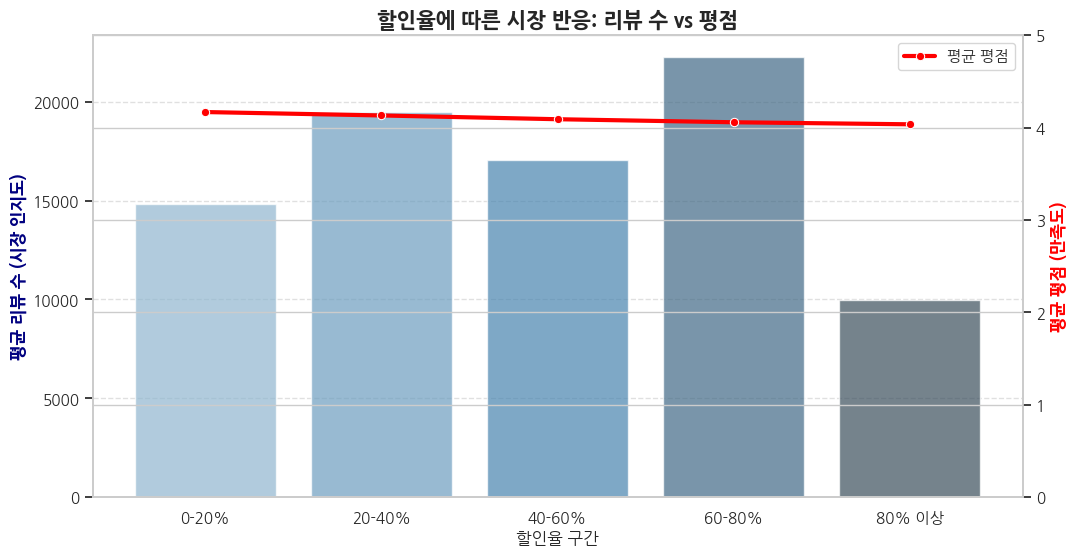

In [54]:
# 시각화 스타일 설정
sns.set_theme(style="whitegrid")
plt.rc('font', family='NanumGothic') # 한글 깨짐 방지 (설치된 폰트에 따라 변경)

fig, ax1 = plt.subplots(figsize=(12, 6))

# 1. 평균 리뷰 수 시각화 (막대 그래프)
sns.barplot(data=stats_report, x='할인율 구간', y='평균 리뷰 수', ax=ax1, palette='Blues_d', alpha=0.7)
ax1.set_ylabel('평균 리뷰 수 (시장 인지도)', fontsize=12, fontweight='bold', color='navy')
ax1.set_title('할인율에 따른 시장 반응: 리뷰 수 vs 평점', fontsize=15, fontweight='bold')

# 2. 평균 평점 시각화 (꺾은선 그래프 - 보조축 사용)
ax2 = ax1.twinx()
sns.lineplot(data=stats_report, x='할인율 구간', y='평균 평점', ax=ax2, color='red', marker='o', linewidth=3, label='평균 평점')
ax2.set_ylabel('평균 평점 (만족도)', fontsize=12, fontweight='bold', color='red')
ax2.set_ylim(0, 5) # 평점 범위 고정

# 범례 및 레이아웃 정리
ax1.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Text(0.5, 1.0, 'Original: rating_count vs Rating')

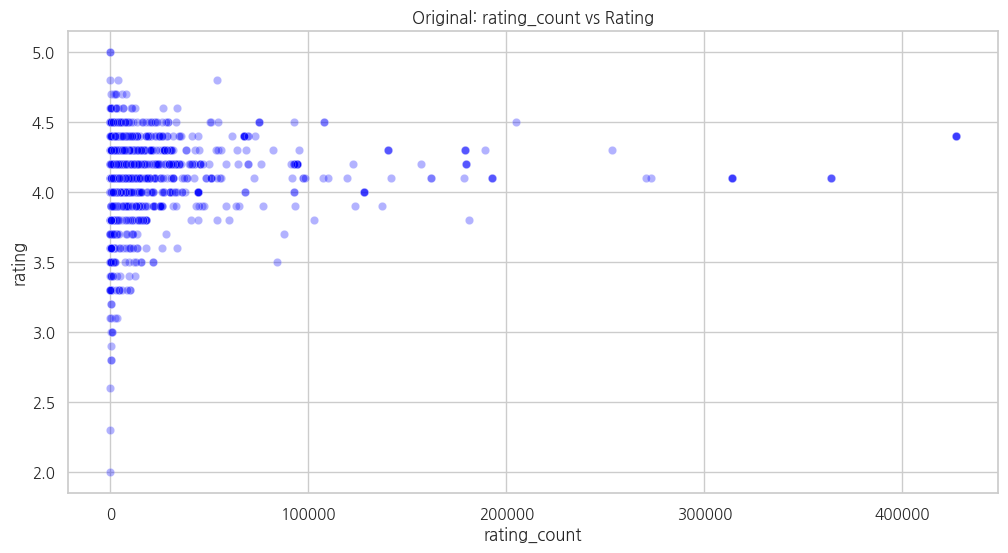

In [55]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

sns.scatterplot(data=df, x='rating_count', y='rating', alpha=0.3, color='blue')
axes.set_title('Original: rating_count vs Rating')


In [56]:
import plotly.express as px

# 3D Scatter Plot 생성
fig = px.scatter_3d(
    df, 
    x='actual_price', 
    y='discount_percentage', 
    z='rating', 
    color='rating',           # 평점에 따라 색상 변경
    size='rating',      # 리뷰 수가 많을수록 점을 크게 표시
    opacity=0.7,
    labels={'actual_price': 'Original Price', 'discount_percentage': 'discount_percentage', 'rating': 'rating'},
    title='3D Analysis: Price vs. Rating'
)

# 레이아웃 설정 (차트가 너무 작지 않게)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

In [57]:
# 3D Scatter Plot 생성
fig = px.scatter_3d(
    df, 
    x='actual_price', 
    y='discounted_price', 
    z='rating_count',
    color='rating_count',           # 평점에 따라 색상 변경
    size='rating_count',      # 리뷰 수가 많을수록 점을 크게 표시
    opacity=0.7,
    labels={'actual_price': 'Original Price', 'discounted_price': 'discounted_price', 'rating_count': 'rating_count'},
    title='3D Analysis: Price vs. rating_count'
)

# 레이아웃 설정 (차트가 너무 작지 않게)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### 4. 특성엔지니어링

In [58]:
# **Success Score 정의**: `Rating * log10(Rating_Count + 1)
# Success Score 계산
# 로그를 취해 Rating Count의 스케일을 조정하고 Rating과 곱함
# rating이 같더라도 rating_count의 따라 rating의 신뢰도가 다르므로 비교할 수 있도록 로그로 변환한 Success Score 정의 
df['success_score'] = df['rating'] * np.log10(df['rating_count'] + 1)

display(df[['product_name', 'main_category', 'sub_category', 'rating', 'rating_count', 'success_score']].head())

,product_name,main_category,sub_category,rating,rating_count,success_score
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,USBCables,4.2,24269.0,18.417293
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,USBCables,4.0,43994.0,18.573613
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,USBCables,3.9,7928.0,15.206952
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,USBCables,4.2,94363.0,20.894187
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,USBCables,4.2,16905.0,17.757772


In [59]:
# 브랜드 구분하기

# 1. 첫 두 단어를 합친 컬럼 만들기
def get_first_two_words(name):
    words = name.split()
    return " ".join(words[:2]) if len(words) >= 2 else words[0]

df['two_words'] = df['product_name'].apply(get_first_two_words)

# 2. 빈도수 확인
top_combinations = df['two_words'].value_counts().head(20)
print("상위 브랜드 조합:\n", top_combinations)

상위 브랜드 조합:
 two_words
Amazon Basics          21
Portronics Konnect     19
Samsung Galaxy         19
Noise ColorFit         15
AmazonBasics USB       11
Ambrane Unbreakable    11
Boult Audio            11
Gizga Essentials       11
Fire-Boltt Ninja       10
Redmi Note             10
Wayona Nylon           10
pTron Solero           10
boAt Wave               9
iQOO Z6                 9
SanDisk Ultra           9
7SEVEN® Compatible      8
Ambrane 60W             7
boAt Rockerz            7
boAt Bassheads          7
Wayona Usb              6
Name: count, dtype: int64


In [60]:
def finalize_brand_v2(text):
    # 1. 앞뒤 공백 제거 및 소문자로 통일
    clean_text = str(text).strip()
    lower_text = clean_text.lower()
    
    # 2. 'amazon'이 포함되어 있으면 무조건 'Amazon'으로 통합
    if 'amazon' in lower_text:
        return 'Amazon'
    
    # 3. 그 외 주요 브랜드 통합
    mapping = {
        'samsung galaxy': 'Samsung',
        'boat wave': 'boAt',
        'boat rockerz': 'boAt',
        'boat bassheads': 'boAt',
        'pigeon by': 'Pigeon',
        'ambrane unbreakable': 'Ambrane',
        'wayona nylon': 'Wayona'
    }
    
    if lower_text in mapping:
        return mapping[lower_text]
    
    # 4. 나머지는 첫 단어만 추출하되 깔끔하게 반환
    return clean_text.split()[0]

# 컬럼 업데이트
df['brand_final'] = df['two_words'].apply(finalize_brand_v2)

# 잘 바뀌었는지 상위 10개 출력해서 확인
print(df['brand_final'].value_counts().head(10))

brand_final
boAt          67
Amazon        62
Samsung       36
Portronics    31
Ambrane       29
Bajaj         26
Redmi         26
Fire-Boltt    26
Wayona        24
Noise         24
Name: count, dtype: int64


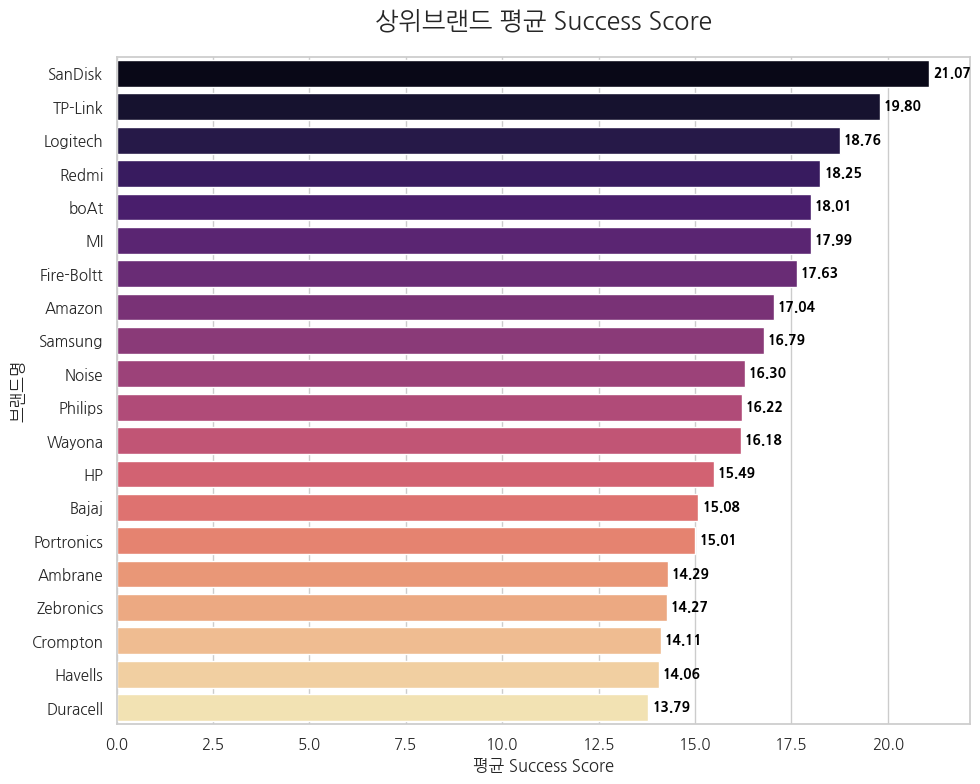

In [61]:
plt.figure(figsize=(10, 8))

# 1. 데이터 준비 (기존 코드와 동일)
brand_counts = df['brand_final'].value_counts()
major_brands = brand_counts[brand_counts >= 15].index
brand_analysis = df[df['brand_final'].isin(major_brands)].groupby('brand_final')['success_score'].mean().sort_values(ascending=False)

# 2. 그래프 그리기
ax = sns.barplot(x=brand_analysis.values, y=brand_analysis.index, palette='magma')

# --- 3. 데이터 레이블(숫자) 추가 부분 ---
for i, v in enumerate(brand_analysis.values):
    # x축 값(v) 옆에 텍스트를 표시 (v + 0.1 정도로 여백 부여)
    ax.text(v + 0.1, i, f'{v:.2f}', color='black', va='center', fontweight='bold', fontsize=10)
# --------------------------------------

plt.title('상위브랜드 평균 Success Score', fontsize=18, pad=20)
plt.xlabel('평균 Success Score', fontsize=12)
plt.ylabel('브랜드명', fontsize=12)

plt.tight_layout()
plt.show()

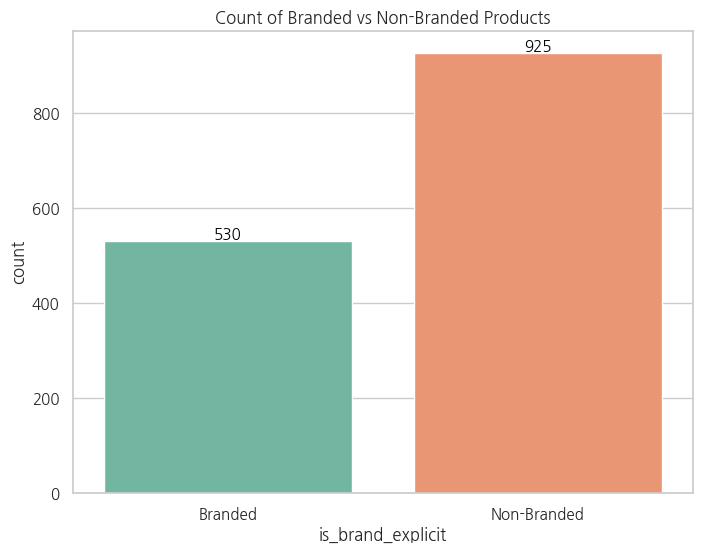

In [62]:
# 브랜드 유무를 판단하는 기준 생성 (아까 만든 brand_final 활용)
# 빈도가 낮은 브랜드나 'Others'로 분류된 것들을 'No Brand'로 그룹화
major_brand_list = df['brand_final'].value_counts()[df['brand_final'].value_counts() >= 15].index

df['is_brand_explicit'] = df['brand_final'].apply(lambda x: 'Branded' if x in major_brand_list and x != 'Others' else 'Non-Branded')

plt.figure(figsize=(8, 6))
# countplot은 데이터의 개수를 자동으로 세서 막대로 그려줍니다.
ax = sns.countplot(x='is_brand_explicit', data=df, palette='Set2')

# 막대 위에 숫자 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Branded vs Non-Branded Products')
plt.show()

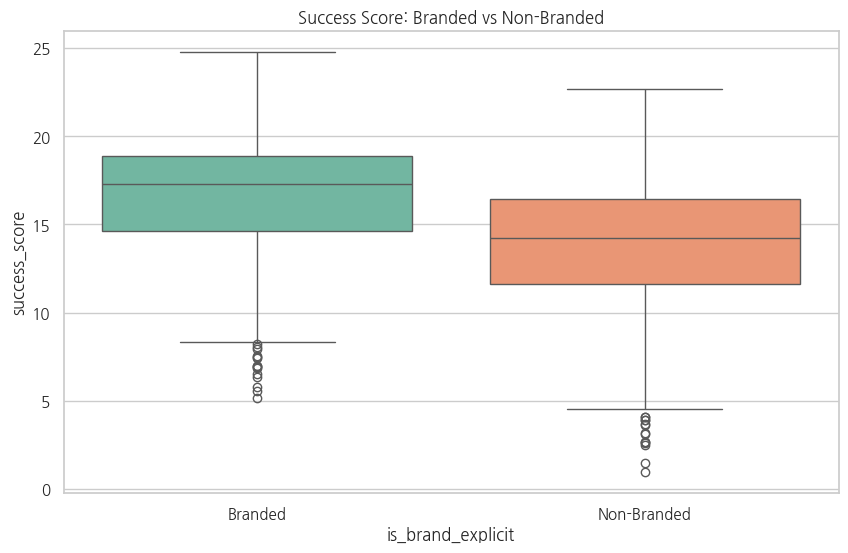

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_brand_explicit', y='success_score', data=df, palette='Set2')
plt.title('Success Score: Branded vs Non-Branded')
plt.show()

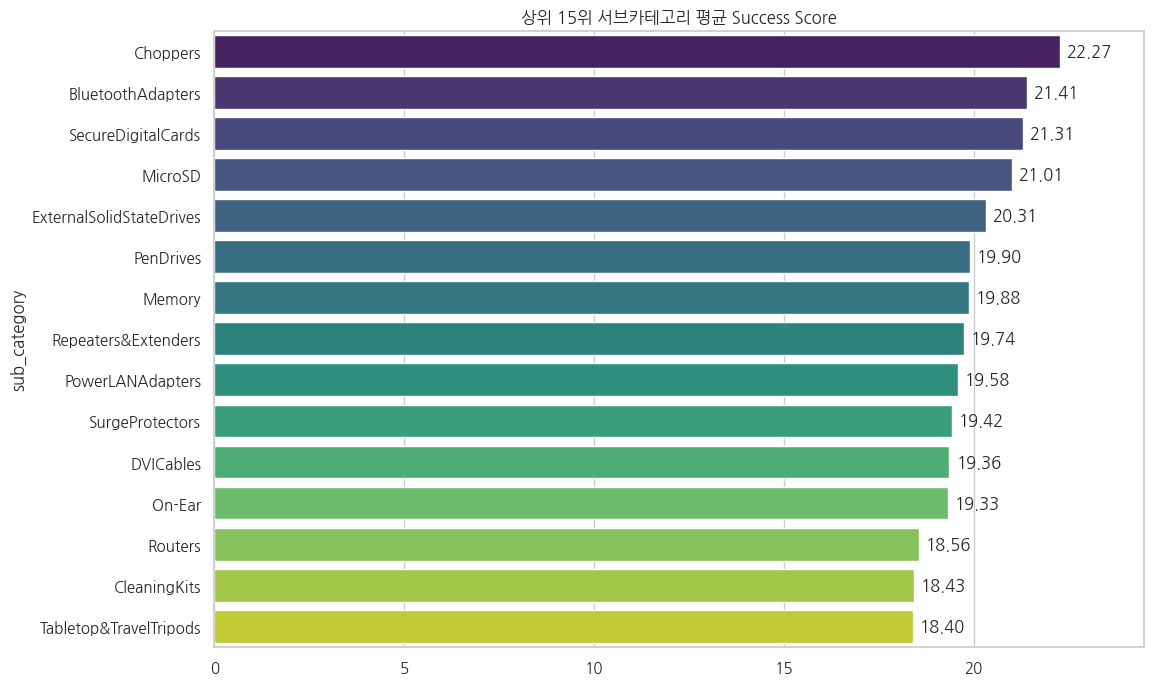

In [64]:
plt.figure(figsize=(12, 8))
sub_score_mean = df.groupby('sub_category')['success_score'].mean().sort_values(ascending=False).head(15)

# 1. 그래프 그리기
ax = sns.barplot(x=sub_score_mean.values, y=sub_score_mean.index, palette='viridis', hue=sub_score_mean.index, legend=False)

# 2. 모든 컨테이너(막대 그룹)를 돌면서 레이블 추가
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=5)

plt.title('상위 15위 서브카테고리 평균 Success Score')
plt.xlim(0, max(sub_score_mean.values) * 1.1) # 오른쪽 여백 확보

plt.show()

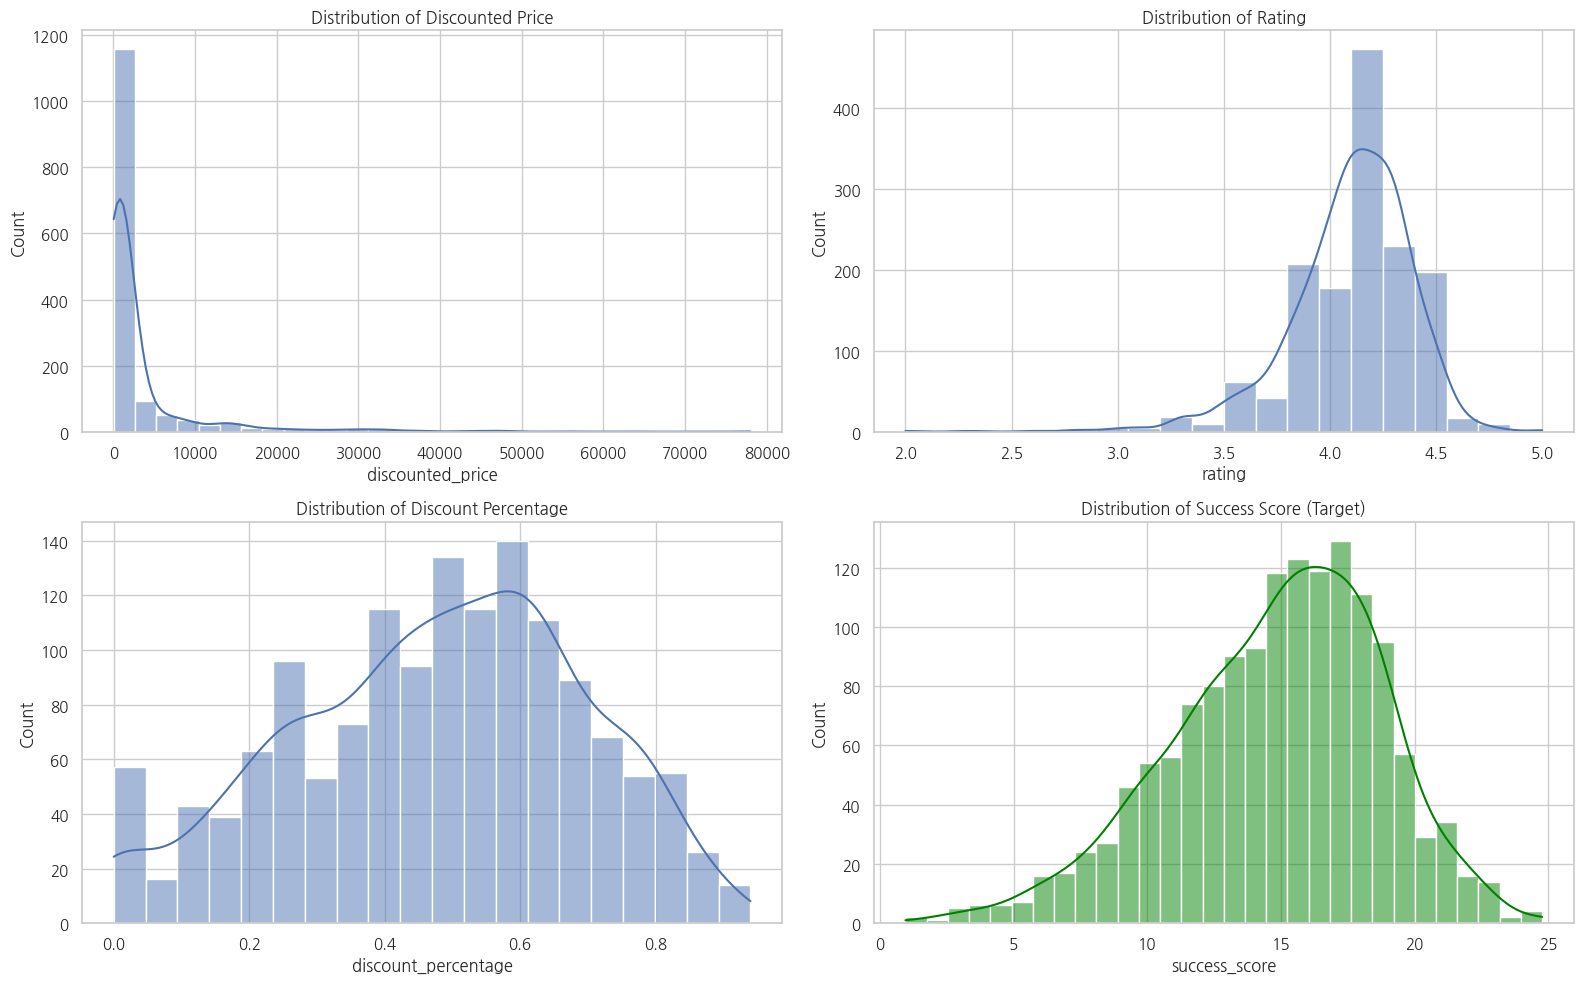

In [65]:
# 2. 수치형 변수 분포 및 Success Score 분포
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(df['discounted_price'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Discounted Price')

sns.histplot(df['rating'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rating')

sns.histplot(df['discount_percentage'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Discount Percentage')

sns.histplot(df['success_score'], bins=30, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Success Score (Target)')

plt.tight_layout()
plt.show()

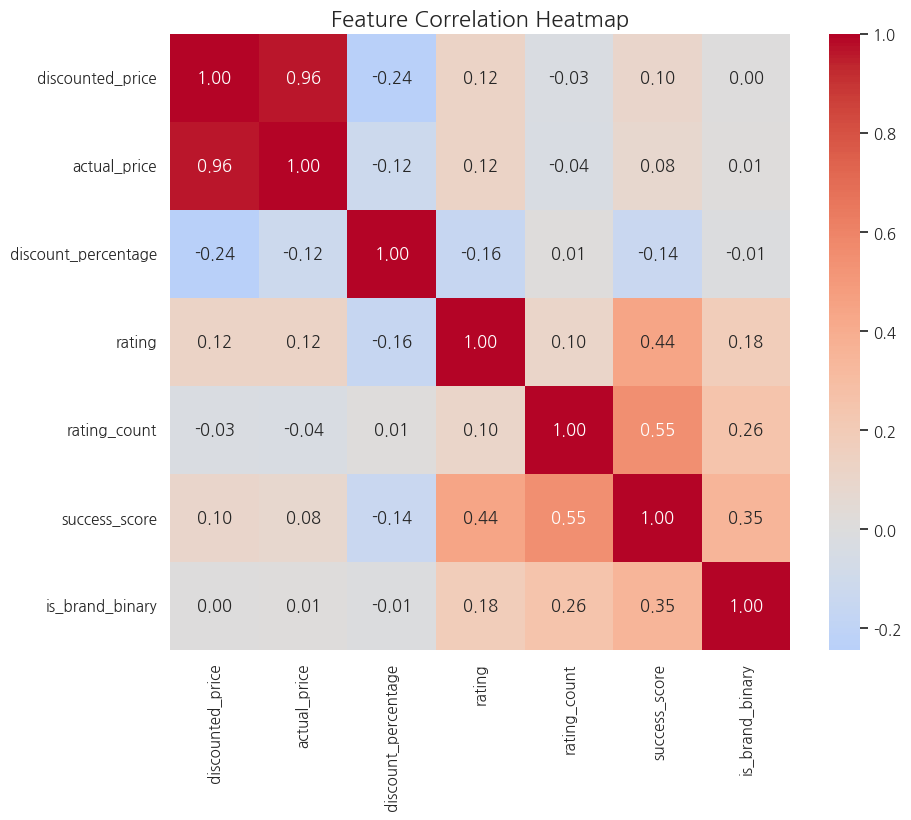

In [66]:
# 1. 브랜드 유무를 숫자로 변환 (Branded: 1, Non-Branded: 0)
df['is_brand_binary'] = df['is_brand_explicit'].map({'Branded': 1, 'Non-Branded': 0})

# 2. 히트맵에 포함할 숫자형 컬럼 선택
# 수치형 데이터(float64)와 새로 만든 바이너리 변수만 추출합니다.
numeric_cols = [
    'discounted_price', 'actual_price', 'discount_percentage', 
    'rating', 'rating_count', 'success_score', 'is_brand_binary'
]

# 3. 상관계수 계산
corr_matrix = df[numeric_cols].corr()

# 4. 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

## 5. Autogluon

In [67]:
# 1. 학습에 사용할 최종 컬럼들만 선택 (텍스트 덩어리 및 ID 제외)
features = [
    'main_category', 'sub_category', 'brand_final', 
    'discounted_price', 'actual_price', 'discount_percentage', 
    'rating', 'rating_count', 'is_brand_explicit', 'success_score'
]

# 2. 데이터 분할
# test_size=0.2는 20%를 테스트용으로 떼어놓겠다는 뜻입니다.
train_data, test_data = train_test_split(df[features], test_size=0.2, random_state=42)

print(f"학습용 데이터: {len(train_data)}개")
print(f"테스트용 데이터: {len(test_data)}개")

학습용 데이터: 1164개
테스트용 데이터: 291개


In [68]:
# 1. 정답(Target) 컬럼 지정
label = 'success_score'

# 2. 모델 학습 (시간 제한이나 품질 옵션을 조절할 수 있습니다)
# 'best_quality'는 성능을 최우선으로 하며, 시간이 부족하다면 'medium_quality'를 사용하세요.
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error').fit(
    train_data, 
    presets='best_quality',
    time_limit=600 # 최대 10분 동안 학습
)

No path specified. Models will be saved in: "AutogluonModels\ag-20260212_084203"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.11.14
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          6
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       15.01 GB / 31.92 GB (47.0%)
Disk Space Avail:   171.16 GB / 465.19 GB (36.8%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	

## 6. 모델 평가 및 분석

In [69]:
# 1. 테스트 데이터에서 정답을 제외한 뒤 예측 수행
y_test = test_data[label]
test_data_nolabel = test_data.drop(columns=[label])

# 2. 예측 및 평가
performance = predictor.evaluate(test_data)
print("모델 성능 평가 결과:", performance)

# 3. 어떤 모델이 가장 우수했는지 순위 확인 (Leaderboard)
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

모델 성능 평가 결과: {'root_mean_squared_error': np.float64(-0.1314427849188386), 'mean_squared_error': -0.017277205707220064, 'mean_absolute_error': -0.05164792267849599, 'r2': 0.9988300254808186, 'pearsonr': 0.9994162373541298, 'median_absolute_error': -0.020184332826509888}
                     model  score_test  score_val              eval_metric  \
0          CatBoost_BAG_L1   -0.121304  -0.170689  root_mean_squared_error   
1      WeightedEnsemble_L3   -0.131443  -0.142707  root_mean_squared_error   
2      WeightedEnsemble_L2   -0.131542  -0.153486  root_mean_squared_error   
3          CatBoost_BAG_L2   -0.144048  -0.174234  root_mean_squared_error   
4   RandomForestMSE_BAG_L2   -0.148993  -0.151349  root_mean_squared_error   
5          LightGBM_BAG_L2   -0.231790  -0.215111  root_mean_squared_error   
6   RandomForestMSE_BAG_L1   -0.236873  -0.234839  root_mean_squared_error   
7     ExtraTreesMSE_BAG_L1   -0.249878  -0.274986  root_mean_squared_error   
8        LightGBMXT_BAG_L1  

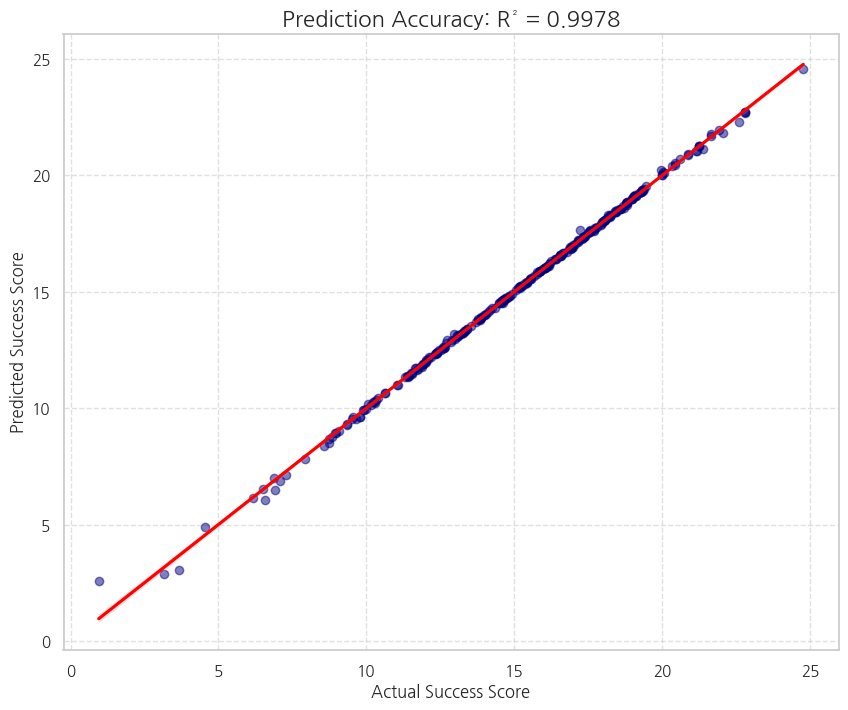

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = predictor.predict(test_data)
y_true = test_data['success_score']

plt.figure(figsize=(10, 8))
# 실제값과 예측값 시각화
sns.regplot(x=y_true, y=y_pred, scatter_kws={'alpha':0.5, 'color':'navy'}, line_kws={'color':'red'})

plt.title(f'Prediction Accuracy: R² = {0.9978}', fontsize=16)
plt.xlabel('Actual Success Score')
plt.ylabel('Predicted Success Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Computing feature importance via permutation shuffling for 9 features using 291 rows with 5 shuffle sets...
	137.36s	= Expected runtime (27.47s per shuffle set)
	55.93s	= Actual runtime (Completed 5 of 5 shuffle sets)


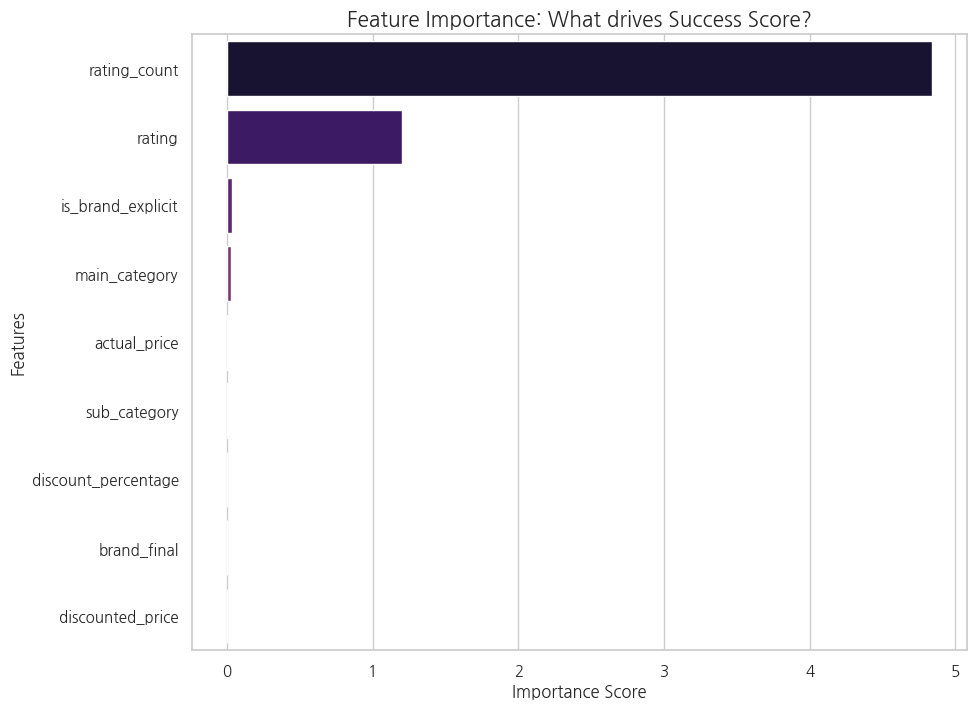

In [71]:
# 변수 중요도 계산
importance = predictor.feature_importance(test_data)

plt.figure(figsize=(10, 8))
sns.barplot(x=importance['importance'], y=importance.index, palette='magma')

plt.title('Feature Importance: What drives Success Score?', fontsize=15)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

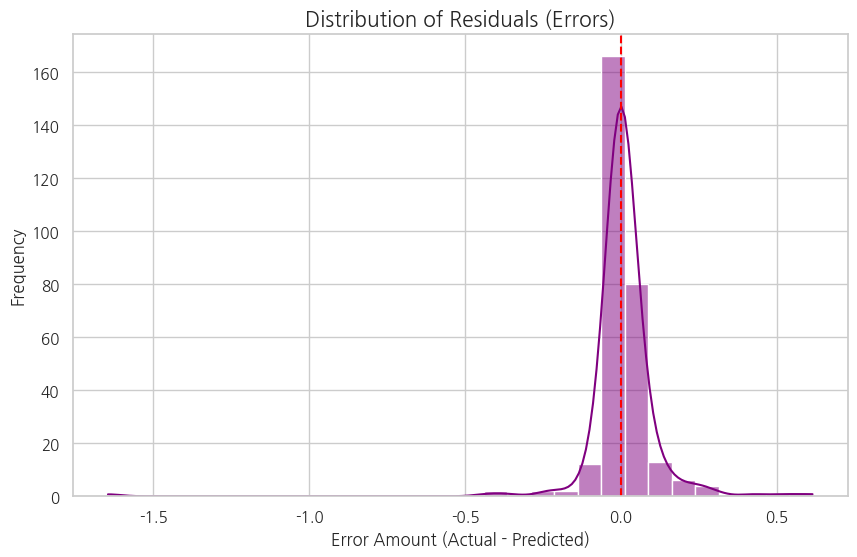

In [72]:
residuals = y_true - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)

plt.axvline(x=0, color='red', linestyle='--')
plt.title('Distribution of Residuals (Errors)', fontsize=15)
plt.xlabel('Error Amount (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()